In [1]:
import os
%pylab inline 
import tensorflow as tf
import DifferentiableHOS as DHOS
import astropy.units as u
import pickle
from scipy import ndimage, misc
from matplotlib import gridspec
import matplotlib.colors as mcolors
import cmasher as cmr

Populating the interactive namespace from numpy and matplotlib


In [2]:
field_size=5.
field_npix=1024
z_source=[0.255,0.462,0.462,0.914,1.302]

### Load DLL results 

In [3]:
mupcounts_DLL_S7 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mupcounts_DLL_S7.npy'), axis=0)
mupcounts_DLL_S12 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mupcounts_DLL_S12.npy'), axis=0)
mupcounts_DLL_S16 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mupcounts_DLL_S16.npy'), axis=0)
mupcounts_DLL_S21 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mupcounts_DLL_S21.npy'), axis=0)
mupcounts_DLL_S27 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mupcounts_DLL_S27.npy'), axis=0)

stdpcounts_DLL_S7 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdpcounts_DLL_S7.npy'), axis=0)
stdpcounts_DLL_S12 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdpcounts_DLL_S12.npy'), axis=0)
stdpcounts_DLL_S16 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdpcounts_DLL_S16.npy'), axis=0)
stdpcounts_DLL_S21 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdpcounts_DLL_S21.npy'), axis=0)
stdpcounts_DLL_S27 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdpcounts_DLL_S27.npy'), axis=0)


## Comparison to kappa TNG

For comparison we use maps from the kappa TNG simulations at the following redshift:

 S7=0.255 
 
 S12=0.462
 
 S16=0.648
 
 S21=0.914
 
 S27=1.302

In [4]:
#S7
kTNG_S7=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa07.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S7.append(kappaTNG)
#S12
kTNG_S12=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa12.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S12.append(kappaTNG)
#S16
kTNG_S16=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa16.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S16.append(kappaTNG)
#S21
kTNG_S21=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa21.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S21.append(kappaTNG)
#S27
kTNG_S27=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa27.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S27.append(kappaTNG)

In [5]:
bins=tf.linspace(-.1, 1.,8)

In [6]:
####
#S7
####
counts_kTNG_S7=[]
for i in range(100):
    countsTNG,bins_=DHOS.statistics.peaks_histogram_tf_mulscale(tf.expand_dims(kTNG_S7[i],axis=0),nscales=7,bins=bins)
    counts_kTNG_S7.append(countsTNG)
####
#S12
####
counts_kTNG_S12=[]
for i in range(100):
    countsTNG,bins_=DHOS.statistics.peaks_histogram_tf_mulscale(tf.expand_dims(kTNG_S12[i],axis=0),nscales=7,bins=bins)
    counts_kTNG_S12.append(countsTNG)
####
#S16
####
counts_kTNG_S16=[]
for i in range(100):
    countsTNG,bins_=DHOS.statistics.peaks_histogram_tf_mulscale(tf.expand_dims(kTNG_S16[i],axis=0),nscales=7,bins=bins)
    counts_kTNG_S16.append(countsTNG)
####
#S21
####
counts_kTNG_S21=[]
for i in range(100):
    countsTNG,bins_=DHOS.statistics.peaks_histogram_tf_mulscale(tf.expand_dims(kTNG_S21[i],axis=0),nscales=7,bins=bins)
    counts_kTNG_S21.append(countsTNG)
####
#S27
####
counts_kTNG_S27=[]
for i in range(100):
    countsTNG,bins_=DHOS.statistics.peaks_histogram_tf_mulscale(tf.expand_dims(kTNG_S27[i],axis=0),nscales=7,bins=bins)
    counts_kTNG_S27.append(countsTNG)


In [7]:
mucounts_kTNG_S7=np.mean(counts_kTNG_S7,axis=0)
mucounts_kTNG_S12=np.mean(counts_kTNG_S12,axis=0)
mucounts_kTNG_S16=np.mean(counts_kTNG_S16,axis=0)
mucounts_kTNG_S21=np.mean(counts_kTNG_S21,axis=0)
mucounts_kTNG_S27=np.mean(counts_kTNG_S27,axis=0)

In [8]:
theta=[]
for i in range(7):
    theta.append(0.292*2**(i+1))

In [9]:
ngal = 20                          # gal/arcmin **2
pix_scale =5/1024*60              # arcmin
ngal_per_pix = ngal * pix_scale**2 # galaxies per pixels
sigma_e = 0.26 / sqrt(ngal_per_pix) # Rescaled noise sigma

In [10]:
ci7=stdpcounts_DLL_S7/mupcounts_DLL_S7
ci12=stdpcounts_DLL_S12/mupcounts_DLL_S12
ci16=stdpcounts_DLL_S16/mupcounts_DLL_S16
ci21=stdpcounts_DLL_S21/mupcounts_DLL_S21
ci27=stdpcounts_DLL_S27/mupcounts_DLL_S27

In [12]:
col = cmr.pride(np.linspace(0.,1,6))  

Text(0.5, 0, 'S/N')

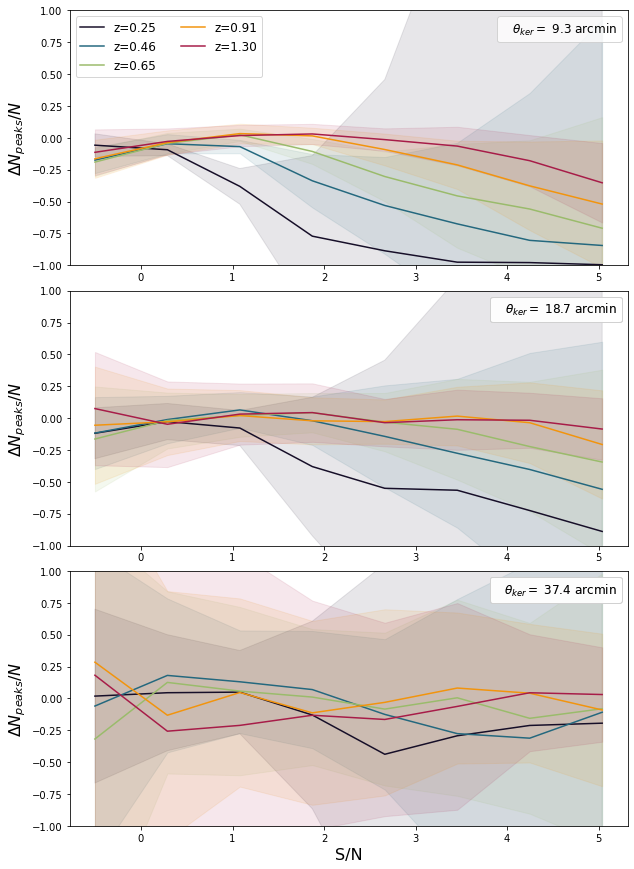

In [13]:
fig = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,1],hspace=0.1) 
for j,i in zip(range(3),range(4,7)):
    ax= plt.subplot(gs[j])
    ll,=ax.plot(bins_/sigma_e,mupcounts_DLL_S7[i]/mucounts_kTNG_S7[i]-1,label= '$\\theta_{ker}=$ %.1f arcmin' %theta[i] ,color=col[0])
    gg,=ax.plot(bins_/sigma_e,mupcounts_DLL_S12[i]/mucounts_kTNG_S12[i]-1,color=col[1])
    dd,=ax.plot(bins_/sigma_e,mupcounts_DLL_S16[i]/mucounts_kTNG_S16[i]-1,color=col[2])
    ff,=ax.plot(bins_/sigma_e,mupcounts_DLL_S21[i]/mucounts_kTNG_S21[i]-1,color=col[3])
    mm,=ax.plot(bins_/sigma_e,mupcounts_DLL_S27[i]/mucounts_kTNG_S27[i]-1,color=col[4])
    ax.set_ylim(-1,1) 
    ax.fill_between(bins_/sigma_e, ((mupcounts_DLL_S7[i]/mucounts_kTNG_S7[i])-1)-ci7[i],  ((mupcounts_DLL_S7[i]/mucounts_kTNG_S7[i])-1)+ci7[i], alpha=.1,color=col[0])
    ax.fill_between(bins_/sigma_e, ((mupcounts_DLL_S12[i]/mucounts_kTNG_S12[i])-1)-ci12[i],  ((mupcounts_DLL_S12[i]/mucounts_kTNG_S12[i])-1)+ci12[i], alpha=.1,color=col[1])
    ax.fill_between(bins_/sigma_e, ((mupcounts_DLL_S16[i]/mucounts_kTNG_S16[i])-1)-ci16[i],  ((mupcounts_DLL_S16[i]/mucounts_kTNG_S16[i])-1)+ci16[i], alpha=.1,color=col[2])
    ax.fill_between(bins_/sigma_e, ((mupcounts_DLL_S21[i]/mucounts_kTNG_S21[i])-1)-ci21[i],  ((mupcounts_DLL_S21[i]/mucounts_kTNG_S21[i])-1)+ci21[i], alpha=.1,color=col[3])
    ax.fill_between(bins_/sigma_e, ((mupcounts_DLL_S27[i]/mucounts_kTNG_S27[i])-1)-ci27[i],  ((mupcounts_DLL_S27[i]/mucounts_kTNG_S27[i])-1)+ci27[i], alpha=.1,color=col[4])
    ax.set_ylabel('$\Delta N_{peaks}/N$',fontsize=16)
    leg1=ax.legend( loc='upper right',handlelength=0,fontsize='large',)
    ax.add_artist(leg1)
    if i==4:
        leg2 = ax.legend( [ll,gg,dd,ff,mm],['z=0.25','z=0.46','z=0.65','z=0.91','z=1.30'], ncol=2, loc='upper left',fontsize='large')
        leg = ax.get_legend()  
ax.set_xlabel('S/N',fontsize=16)
#plt.savefig('../figures/res_peak_DLL_vs_ktng.pdf')